necessary imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

f. for loading the data

In [2]:
def load_data():
    X_train = np.load('/Users/karolinanowacka/Downloads/solvro-rekrutacja-zimowa-ml-2022/X_train.npy')
    y_train = np.load('/Users/karolinanowacka/Downloads/solvro-rekrutacja-zimowa-ml-2022/y_train.npy')
    
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"unique labels in y_train: {np.unique(y_train)}")

    return X_train, y_train.astype(int)

f. for checking if there are any missings in the dataset

In [3]:
def check_missing_values(data):
    if np.isnan(data).any():
        raise ValueError("there are missing values in dataset")
    print(f"missing values: {np.isnan(data).sum()}")

f. for removing outliers

In [4]:
def remove_outliers(X_train, y_train, threshold=3):
    mean = np.mean(X_train, axis = 0)
    std_dev = np.std(X_train, axis = 0)

    std_dev = np.where(std_dev == 0, 1, std_dev)
    
    z_scores = (X_train - mean) / std_dev
    mask = np.abs(z_scores) < threshold
    mask = mask.all(axis = 2).all(axis = 1)
    return X_train[mask], y_train[mask]

f. for scaling the data

In [5]:
def scale_data(X):
    reshaped_data = X.reshape(-1, 2)
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(reshaped_data)
    scaled_data = scaled_data.reshape(X.shape)
    return scaled_data

f. for checking if there are any duplicates in the dataset

In [6]:
def check_duplicates(data):
    data_reshaped = data.reshape(data.shape[0], -1)
    data_tuples = [tuple(row) for row in data_reshaped]
    seen = set()
    for item in data_tuples:
        if item in seen:
            return True
        seen.add(item)
    return False

f. for removing duplicates (there were none so it was actualy redundant)

In [7]:
def remove_duplicates(X_train):
    data_reshaped = X_train.reshape(X_train.shape[0], -1)
    data_tuples = [tuple(row) for row in data_reshaped]
    uniques = np.unique(data_tuples, axis=1) 
    return uniques.reshape(len(uniques), 300, 2) 

f. for plotting trajectories (visualization purpose)

In [8]:
def plot_trajectories(X, num_samples):
    for i in range(num_samples):
        plt.figure(figsize = (10,10))
        x_coords = X[i, :, 0]
        y_coords = X[i, :, 1]

        plt.plot(x_coords, y_coords, color = 'blue', label = f'Sample {i}')
        plt.scatter(x_coords[0], y_coords[0], color = 'green', s = 50, label = 'Start', zorder = 5)
        plt.scatter(x_coords[-1], y_coords[-1], color = 'red', s = 50, label = 'End', zorder = 5)
       
        plt.title('Particle Trajectory')
        plt.xlabel('x coordinate')
        plt.ylabel('y coordinate')
        plt.legend()
        plt.show()


beginning of EDA

calculating averages sepearately for x and y coordinate (for each particle, separatelly)

In [9]:
def calculate_avg(data):
    X_avg = np.mean(data[:, :,0], axis = 1)
    y_avg = np.mean(data[:, :,1], axis = 1)

    return X_avg, y_avg

plotting histograms of avgs (visualization)

In [10]:
def plot_histogram(data, data_name, xmin, xmax):
    plt.figure(figsize=(10,10))
    sns.histplot(data, bins = 15000, edgecolor = 'black', linewidth = 1)
    plt.xlim(xmin, xmax)
    plt.title(f'distribution of {data_name}')
    plt.xlabel(data_name)
    plt.ylabel('freq')
    plt.show()

calculating std's (again: separatelly for each particle and for each coordinate of the particle)

In [11]:
def calculate_std(data):
    X_std = np.std(data[:, :, 0], axis = 1)
    y_std = np.std(data[:, :, 1], axis = 1)

    return X_std, y_std


checking if the classes are balanced or not (distibution of assigned classes)

In [12]:
def check_balance(y):
    one_hot_columns = [i for i in range(y.shape[1]) if np.array_equal(np.unique(y[:, i]), [0, 1])]
    class_counts = np.sum(y[:, one_hot_columns], axis=0)

    return class_counts

f. for checking if there are any duplicates in the input dataset

In [13]:
def check_duplicates(data):
    data_reshaped = data.reshape(data.shape[0], -1)
    data_tuples = [tuple(row) for row in data_reshaped]
    seen = set()
    for item in data_tuples:
        if item in seen:
            return True
        seen.add(item)
    return False


f. for the removal of the duplicates

In [14]:
def remove_duplicates(X_train):
    data_reshaped = X_train.reshape(X_train.shape[0], -1)
    data_tuples = [tuple(row) for row in data_reshaped]
    uniques = np.unique(data_tuples, axis=1) 
    return uniques.reshape(len(uniques), 300, 2) 

executing code, comments and observations

In [15]:
print("loading data...")
X_train, y_train = load_data()

loading data...
X_train shape: (49000, 300, 2)
y_train shape: (49000, 5)
unique labels in y_train: [0 1]


quick data overview, mainly for debugging purposes. it also provides information about data shape which is useful for desigining the architecture of the CNN. 

observation: 
input data has a shape of (49000, 300, 2) which means that we have total of 49000 records in 300 timesteps of a 2 dimensional data
by 2 dimensional data we understand (x,y) coordinates of observed particles
labels (y_train) are of a type one-hot embedding, further I will need to transform it to numerical representation.

In [16]:
print("check for missing values...")
check_missing_values(X_train)
check_missing_values(y_train)

check for missing values...
missing values: 0
missing values: 0


observation:
no missings in dataset

In [17]:
print("check for duplicates...")
if check_duplicates(X_train):
    raise ValueError("duplicates found in the training data")

check for duplicates...


observation: no duplicates in the dataset, no need to delete anything

In [18]:
print("removing outliers...")
X_train, y_train = remove_outliers(X_train, y_train)

removing outliers...


self-explainatory

In [19]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (48916, 300, 2)
y_train shape: (48916, 5)


observation:
there were outliers, succesfully deleted them

plotting the trajectories...


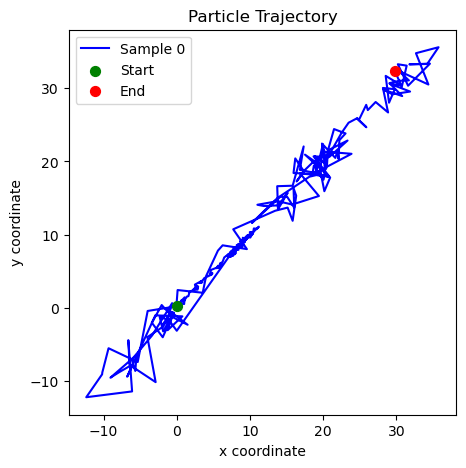

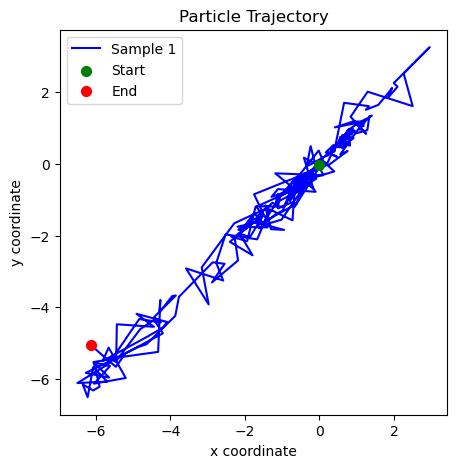

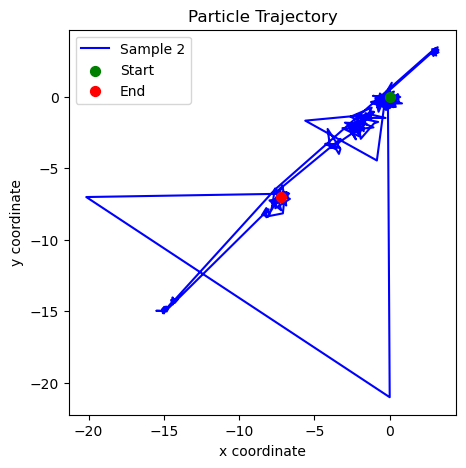

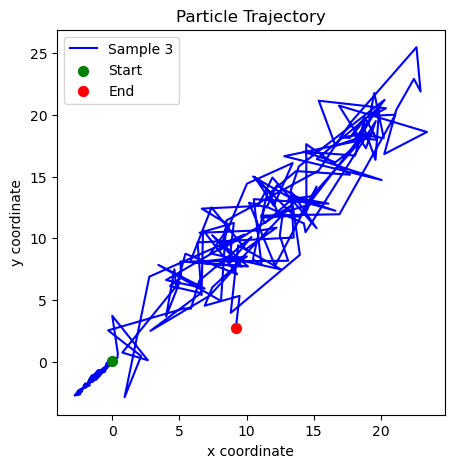

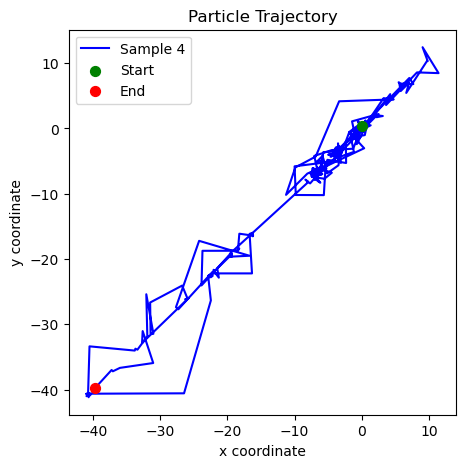

In [20]:
print("plotting the trajectories...")
for i in range(5):
    plt.figure(figsize = (5,5))
    x_coords = X_train[i, :, 0]
    y_coords = X_train[i, :, 1]

    plt.plot(x_coords, y_coords, color = 'blue', label = f'Sample {i}')
    plt.scatter(x_coords[0], y_coords[0], color = 'green', s = 50, label = 'Start', zorder = 5)
    plt.scatter(x_coords[-1], y_coords[-1], color = 'red', s = 50, label = 'End', zorder = 5)

    plt.title('Particle Trajectory')
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.legend()
    plt.show()

it's the first part of visualization: plotting the trajectories of particles

In [21]:
print("calculating averages...")
X_avg, y_avg = calculate_avg(X_train)

calculating averages...


beginning of EDA: calculating avg values of x and y coordinate for each particle

In [22]:
print("printing few first avg of x coordinate...")
print(X_avg[:5])

print("printing few first avg of y coordinate...")
print(y_avg[:5])

printing few first avg of x coordinate...
[ 10.52650254  -1.03165395  -3.05406595   5.46171379 -13.56662282]
printing few first avg of y coordinate...
[ 10.56277328  -1.02060614  -3.06947568   5.4734176  -13.51763215]


debugging purpose
observations: both x and y coordinate of a particle have simmilar avg which means that the particles are rather "condensed" meaning that they are moving around close neighboorhood of the location at which they started.

plotting histograms of avgs...


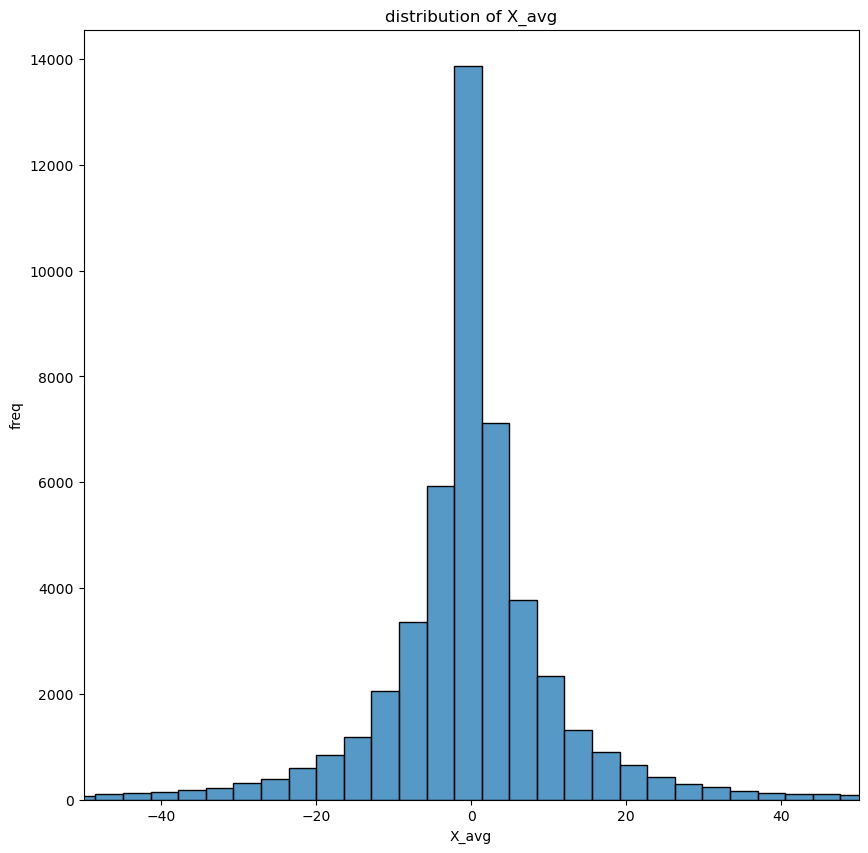

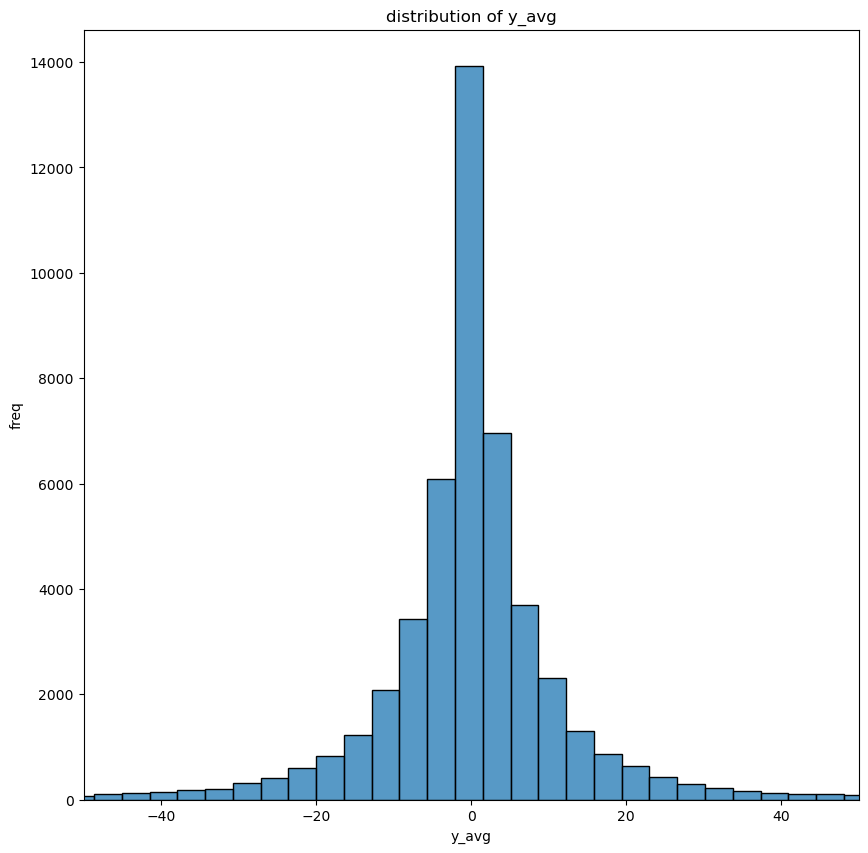

In [23]:
print("plotting histograms of avgs...")
plot_histogram(X_avg, "X_avg", -50, 50)
plot_histogram(y_avg, "y_avg", -50, 50)

visualization: histogram of avgs
observation:
most particles are located around (0,0). the histogram itself is a standard normal distribution. the further we get away from (0,0) the probability of encountering particle decreases.

In [24]:
print("calculating std's...")
X_std, y_std = calculate_std(X_train)

calculating std's...


calculating std's values of x and y coordinate for each particle

In [25]:
print("printing few first stds of x coordinate...")
print(X_std[:5])

print("printing few first stds of y coordinate...")
print(y_std[:5])

printing few first stds of x coordinate...
[ 9.88252741  2.00488877  4.99818917  7.68508091 15.59495632]
printing few first stds of y coordinate...
[10.10201533  2.004327    4.96860135  7.68477825 15.63308574]


debugging

plotting histograms of stds...


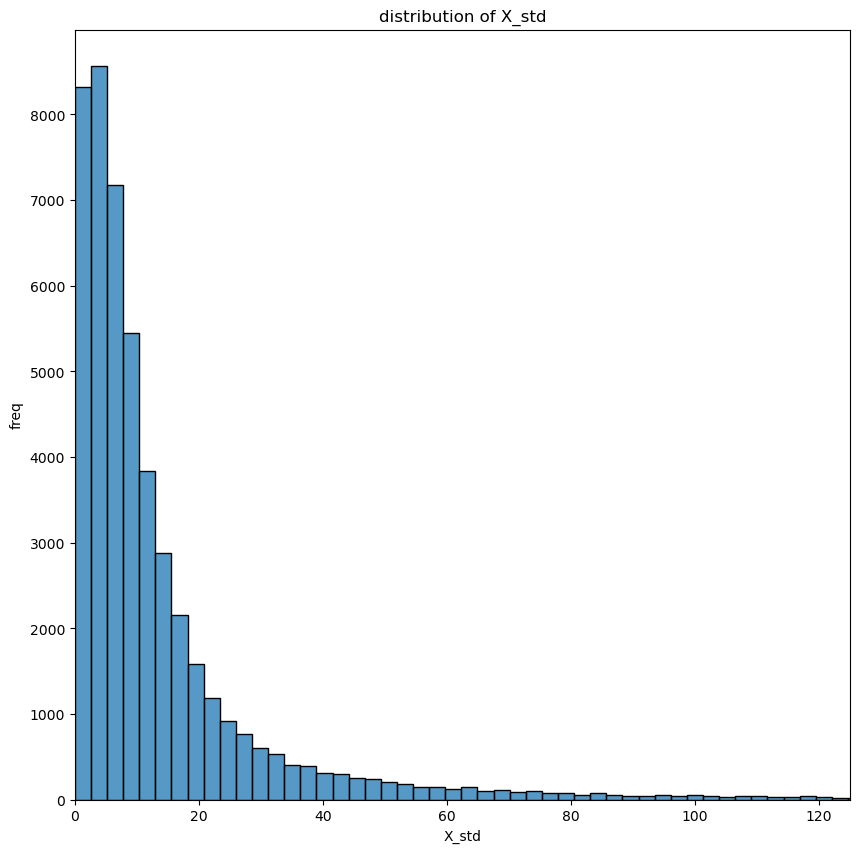

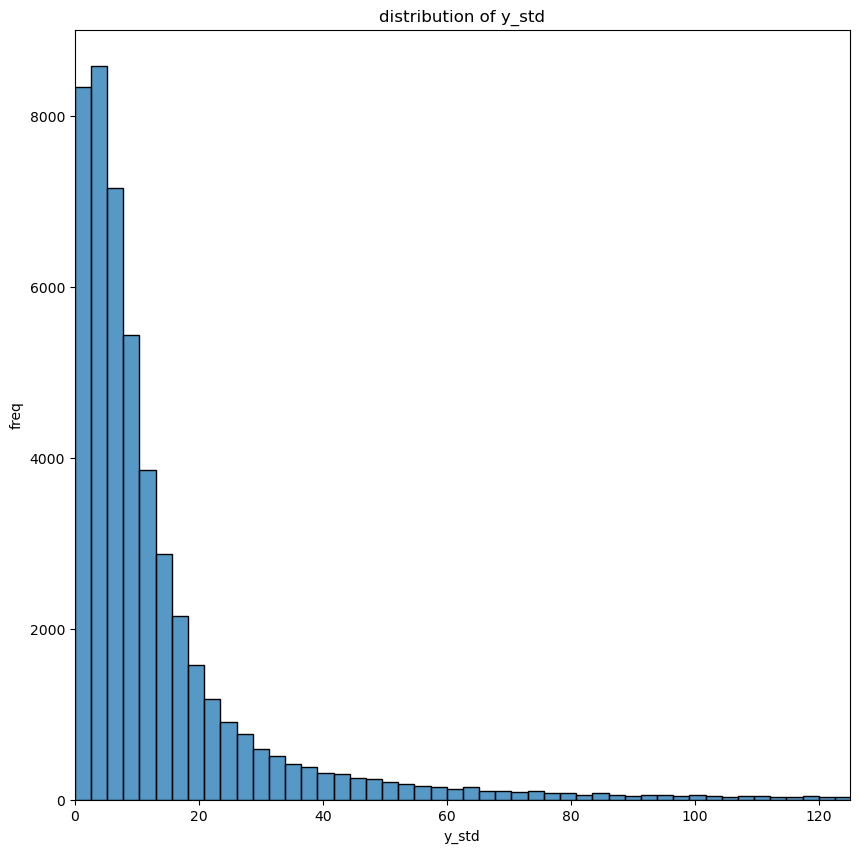

In [26]:
print("plotting histograms of stds...")
plot_histogram(X_std, "X_std", 0, 125)
plot_histogram(y_std, "y_std", 0, 125)

visualization of the results
observation: mainly our particles have small std. the distribution is decreasing in a log manner.

In [27]:
print("checking class balance...")
training_balance = check_balance(y_train)
print(training_balance)

checking class balance...
[9803 9784 9827 9735 9767]


checking the distribution of each class, how big is the representation of each one
observation: the set is balanced. each class is well represented.

In [28]:
print("scaling data...")
X_train = scale_data(X_train)

scaling data...


scaling the data for easier conv. of the cnn

plotting the trajectories after scaling...


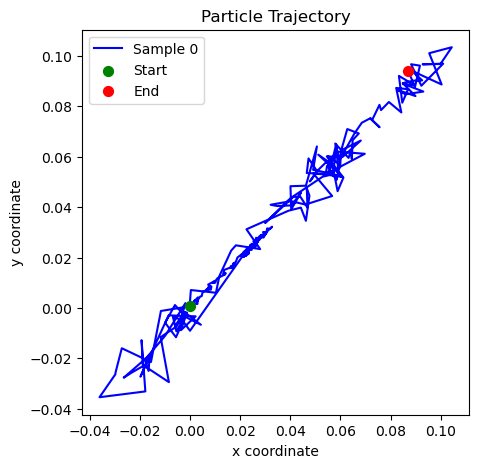

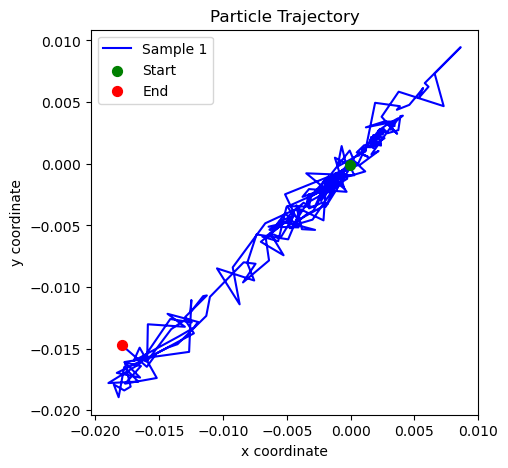

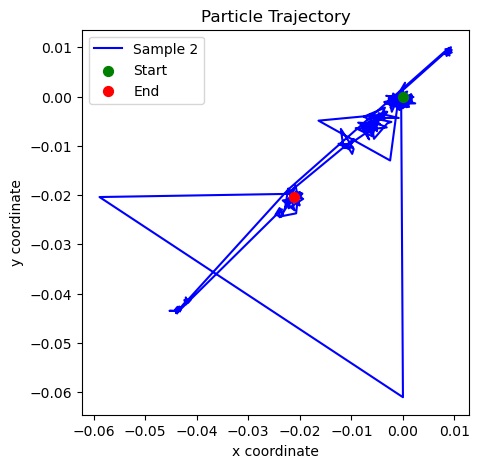

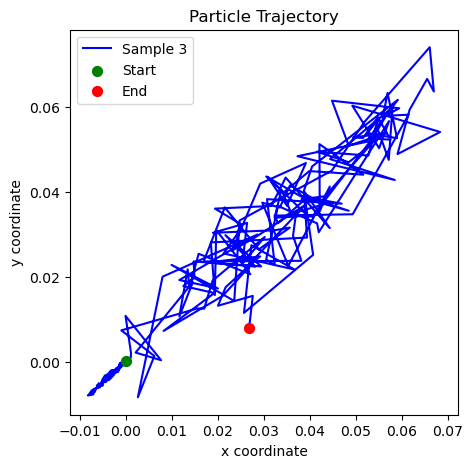

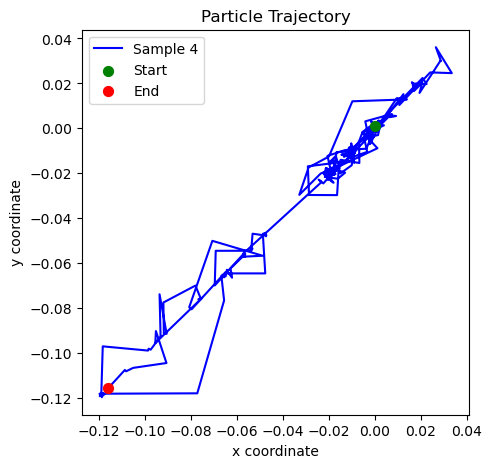

In [29]:
print("plotting the trajectories after scaling...")
for i in range(5):
    plt.figure(figsize = (5,5))
    x_coords = X_train[i, :, 0]
    y_coords = X_train[i, :, 1]

    plt.plot(x_coords, y_coords, color = 'blue', label = f'Sample {i}')
    plt.scatter(x_coords[0], y_coords[0], color = 'green', s = 50, label = 'Start', zorder = 5)
    plt.scatter(x_coords[-1], y_coords[-1], color = 'red', s = 50, label = 'End', zorder = 5)

    plt.title('Particle Trajectory')
    plt.xlabel('x coordinate')
    plt.ylabel('y coordinate')
    plt.legend()
    plt.show()

checking if the scaling process was succesful by plotting the trajectories again, now for the scaled dataset
observation: it went well

after standarization

calculating averages...
plotting histograms of avgs...


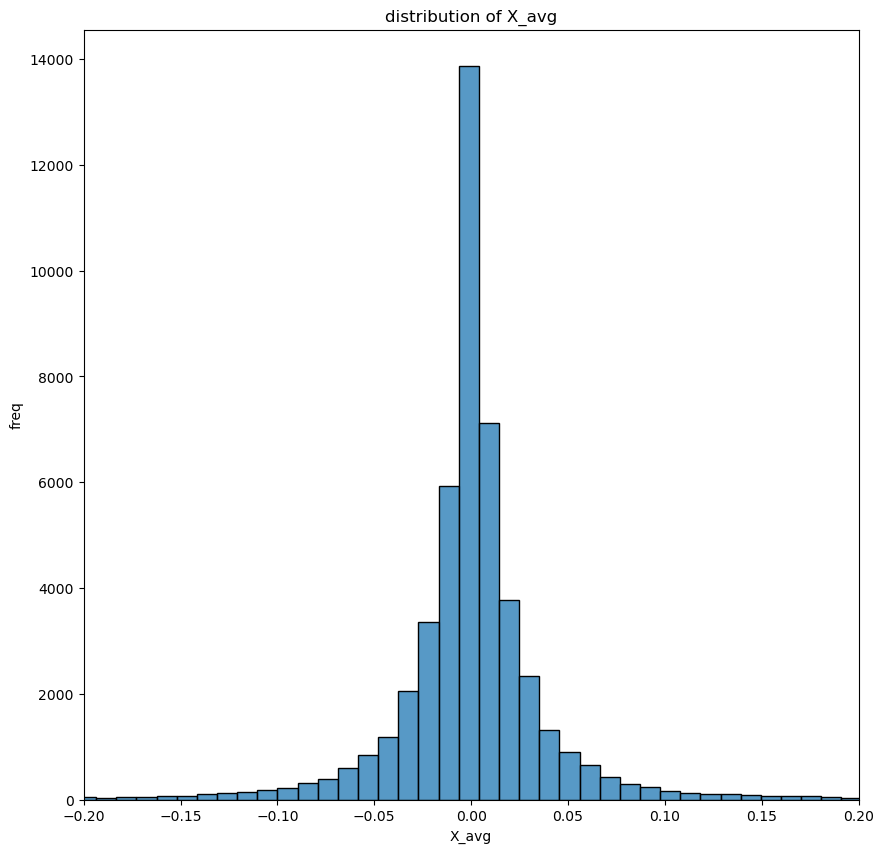

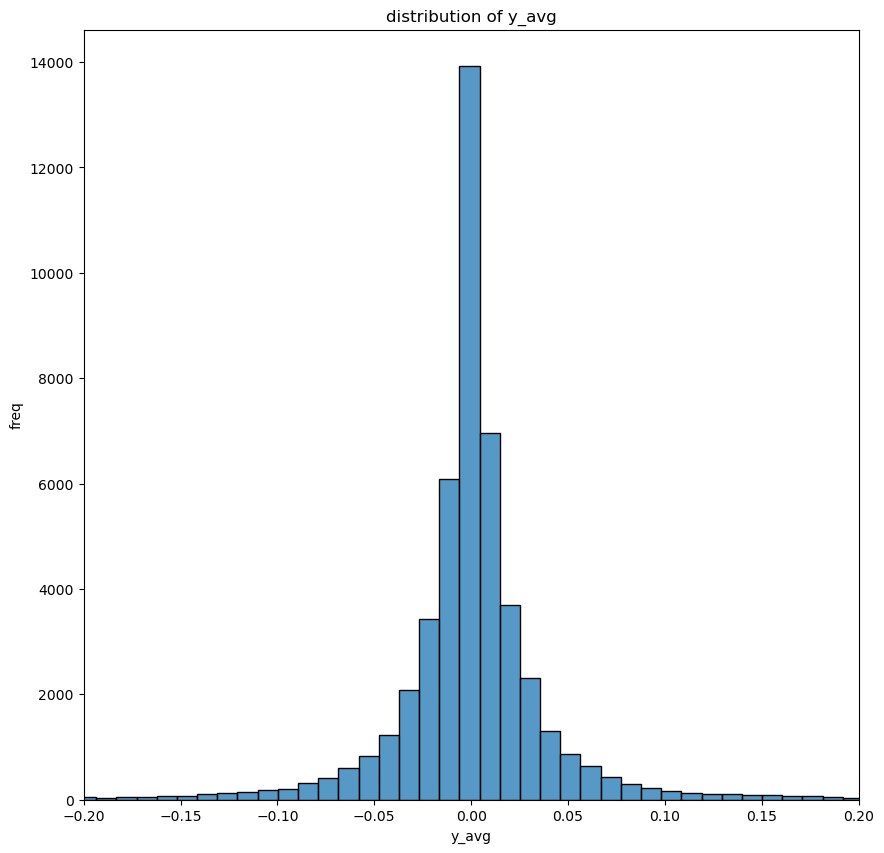

In [35]:

print("calculating averages...")
X_avg, y_avg = calculate_avg(X_train)

print("plotting histograms of avgs...")
plot_histogram(X_avg, "X_avg", -0.2, 0.2)
plot_histogram(y_avg, "y_avg", -0.2, 0.2)